In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [9]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 604799
offset = 1630989
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-23 16:23:49.924397
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 604799 OFFSET 1630989
End date and time using str method of datetime object:
2016-12-23 16:30:47.340456
Execution Completed


In [10]:
dfs.shape

(604799, 16)

In [13]:
dfs.head()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,64977941,2015-12-09,00:00:00,234.35,234.04,234.00,10.54,27.90,28.89,14.21,15377.75,15772.09,0.91,1674,4120176.00,Torschlag_Trafo_09122015.csv
1,64977942,2015-12-09,00:00:01,234.80,234.44,234.41,10.59,27.99,28.82,13.88,15390.90,15802.31,0.91,1674,4120193.92,Torschlag_Trafo_09122015.csv
2,64977943,2015-12-09,00:00:02,234.80,234.44,234.41,10.59,27.99,28.82,13.88,15390.90,15802.31,0.91,1674,4120193.92,Torschlag_Trafo_09122015.csv
3,64977944,2015-12-09,00:00:03,234.80,234.44,234.41,10.59,27.99,28.82,13.88,15390.90,15802.31,0.91,1674,4120193.92,Torschlag_Trafo_09122015.csv
4,64977945,2015-12-09,00:00:04,234.80,234.44,234.41,10.59,27.99,28.82,14.13,15390.90,15802.31,0.91,1674,4120193.92,Torschlag_Trafo_09122015.csv


In [14]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
604794,65850756,2015-12-12,23:59:55,234.88,234.52,234.30,6.89,14.89,17.37,15.45,8633.30,9166.96,0.89,1674,6242798.72,Torschlag_Trafo_12122015.csv
604795,65850757,2015-12-12,23:59:56,234.88,234.52,234.30,6.89,14.89,17.37,15.45,8633.30,9166.96,0.89,1674,6242798.72,Torschlag_Trafo_12122015.csv
604796,65850758,2015-12-12,23:59:57,234.88,234.52,234.30,6.89,14.89,17.37,15.54,8633.30,9166.96,0.89,1674,6242798.72,Torschlag_Trafo_12122015.csv
604797,65850759,2015-12-12,23:59:58,234.91,234.57,234.37,6.83,15.34,17.39,15.54,8727.95,9269.49,0.89,1674,6242798.72,Torschlag_Trafo_12122015.csv
604798,65850760,2015-12-12,23:59:59,234.91,234.57,234.37,6.83,15.34,17.39,15.54,8727.95,9269.49,0.89,1674,6242808.32,Torschlag_Trafo_12122015.csv


# Read the saved CSV


In [ ]:
dfs = pd.read_csv('Torschlag_df.csv',sep=',')

In [ ]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

In [ ]:
columns_list = dfs.columns

# Run the below code when data is read from SQL

In [15]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [16]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [17]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [18]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

319

In [19]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,-0.061186,-0.047795,-0.045950,-0.079694,-0.023684,-0.077319,0.073785,-0.050939,-0.059504,0.113758,0.015347,0.083134
V1,-0.061186,1.000000,0.984781,0.990834,-0.461778,-0.498223,-0.470610,-0.390777,-0.481145,-0.479035,-0.243895,-0.050531,-0.042033
V2,-0.047795,0.984781,1.000000,0.986839,-0.537509,-0.594770,-0.554325,-0.484340,-0.568704,-0.566925,-0.249997,-0.085885,-0.076684
V3,-0.045950,0.990834,0.986839,1.000000,-0.481387,-0.523004,-0.499584,-0.427836,-0.506027,-0.504094,-0.232913,-0.092053,-0.082053
I1,-0.079694,-0.461778,-0.537509,-0.481387,1.000000,0.944327,0.966632,0.576872,0.980414,0.982246,0.508316,-0.053762,-0.069475
I2,-0.023684,-0.498223,-0.594770,-0.523004,0.944327,1.000000,0.959593,0.779126,0.984416,0.984252,0.388380,-0.001593,-0.012601
I3,-0.077319,-0.470610,-0.554325,-0.499584,0.966632,0.959593,1.000000,0.665413,0.988751,0.989328,0.444597,-0.061167,-0.077148
I_N,0.073785,-0.390777,-0.484340,-0.427836,0.576872,0.779126,0.665413,1.000000,0.693088,0.691420,0.028076,0.087665,0.087795
Pges,-0.050939,-0.481145,-0.568704,-0.506027,0.980414,0.984416,0.988751,0.693088,1.000000,0.999222,0.463588,-0.036052,-0.049836
Sges,-0.059504,-0.479035,-0.566925,-0.504094,0.982246,0.984252,0.989328,0.691420,0.999222,1.000000,0.448179,-0.039272,-0.053510


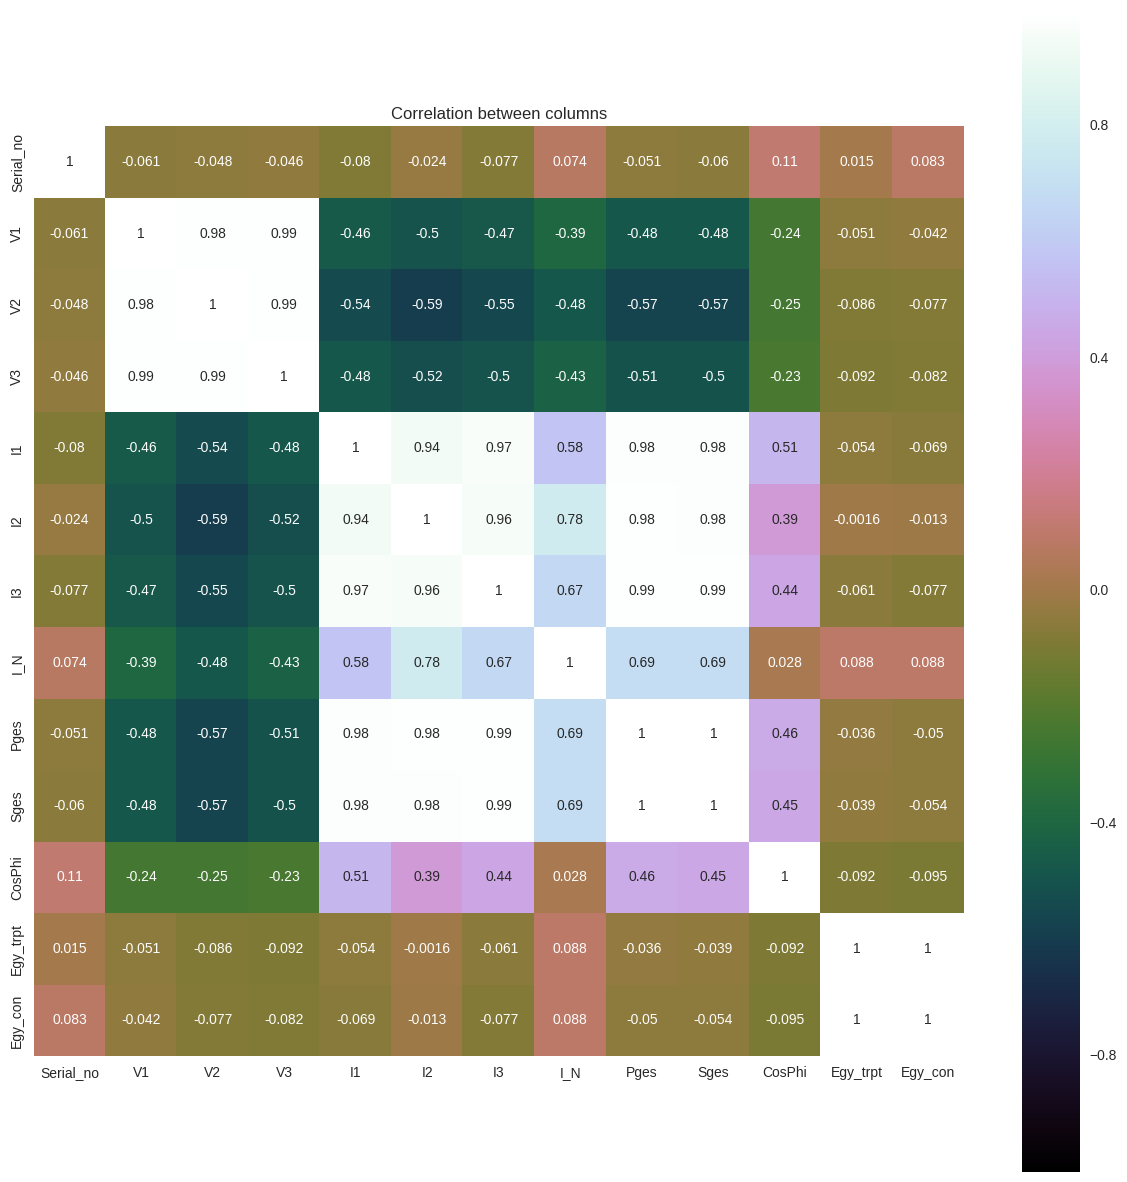

In [20]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_1630989_2235787.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [21]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [22]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000
mean,234.629801,234.120321,233.985714,23.070296,40.014229,34.155972,20.008147,21397.326105,22699.460086,0.897828,10453.067771,11162116.251143
std,1.591838,1.705063,1.602273,24.837351,31.649956,27.461476,9.326548,18139.151632,19222.467800,0.037478,10149.172045,6763201.410941
min,229.150000,228.290000,228.560000,1.870000,3.900000,3.450000,4.610000,-337.820000,3100.780000,0.480000,1674.000000,4120176.000000
25%,233.530000,232.970000,232.910000,6.920000,17.010000,14.570000,13.060000,8667.470000,9153.820000,0.880000,1674.000000,5314150.080000
50%,234.780000,234.310000,234.160000,8.600000,23.230000,20.440000,17.050000,11756.430000,12397.900000,0.900000,1674.000000,6095388.800000
75%,235.870000,235.440000,235.200000,35.420000,60.740000,50.670000,24.850000,32673.290000,34768.540000,0.920000,22495.000000,18617400.320000
max,239.080000,238.450000,238.200000,152.560000,202.710000,157.900000,91.790000,113443.690000,117786.630000,1.010000,22495.000000,19831107.840000


# Saving the basic statistics to csv

In [23]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_1630989_2235787_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [36]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [37]:
#dfs_grp_loc.groupby('Location').describe()

In [24]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                               
Torschlag_Trafo_09122015.csv CosPhi     1.000000 -0.308658       NaN   
                             Egy_con   -0.308658  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.514694  0.023881       NaN   
                             I2         0.404460  0.040343       NaN   
                             I3         0.488369  0.034212       NaN   
                             I_N        0.077704  0.126325       NaN   
                             Pges       0.497709  0.023515       NaN   
                             Serial_no -0.264963  0.981040       NaN   
                             Sges       0.471222  0.035060       NaN   
                             V1        -0.388367  0.382710       NaN   
                             V2        -0.366609  0.285089       NaN   
                             V3        -0.409895  0.339279       NaN   
Torschlag_Trafo_10012016.csv CosPhi     1.000000 -0.148069 -0.213733   
                             Egy_con   -0.148069  1.000000  0.872399   
                             Egy_trpt  -0.213733  0.872399  1.000000   
                             I1         0.499032  0.147816  0.175366   
                             I2        -0.161892  0.288716  0.183816   
                             I3         0.169494  0.492863  0.488869   
                             I_N       -0.544464  0.259185  0.242072   
                             Pges       0.291210  0.390755  0.338090   
                             Serial_no -0.176106  0.996858  0.896022   
                             Sges       0.166186  0.440849  0.399926   
                             V1         0.211742 -0.111761 -0.007073   
                             V2         0.204790 -0.158827 -0.045997   
                             V3         0.234113 -0.188326 -0.086044   
Torschlag_Trafo_10122015.csv CosPhi     1.000000 -0.368367       NaN   
                             Egy_con   -0.368367  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.600932  0.010765       NaN   
...                                          ...       ...       ...   
Torschlag_Trafo_11122015.csv Sges       0.377972 -0.030959       NaN   
                             V1         0.128581 -0.151679       NaN   
                             V2         0.107054 -0.164431       NaN   
                             V3         0.108975 -0.079909       NaN   
Torschlag_Trafo_12012016.csv CosPhi     1.000000 -0.186351       NaN   
                             Egy_con   -0.186351  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.618706  0.016293       NaN   
                             I2         0.507027  0.084021       NaN   
                             I3         0.563119  0.069809       NaN   
                             I_N        0.223151  0.224762       NaN   
                             Pges       0.570550  0.063198       NaN   
                             Serial_no -0.181737  0.980341       NaN   
                             Sges       0.562051  0.061087       NaN   
                             V1        -0.427686 -0.117837       NaN   
                             V2        -0.439276 -0.131585       NaN   
                             V3        -0.434864 -0.089773       NaN   
Torschlag_Trafo_12122015.csv CosPhi     1.000000 -0.373568       NaN   
                             Egy_con   -0.373568  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.497769  0.180847       NaN   
                             I2        -0.367963  0.478528       NaN   
                             I3        -0.253063  0.542218       NaN   
          

# Plot voltage vs time

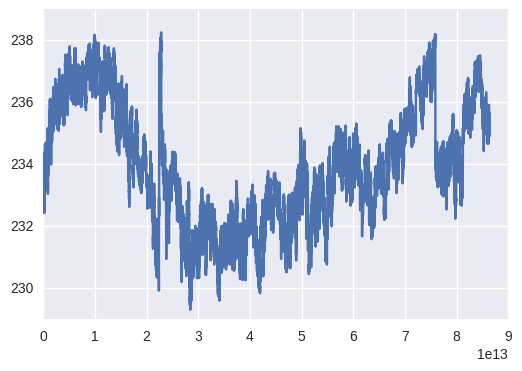

In [23]:
import datetime
import numpy as np

x = dfs['Time'].where (dfs['Location'] == 'Torschlag_Trafo_06012016.csv')
y = dfs['V1'].where (dfs['Location'] == 'Torschlag_Trafo_06012016.csv')

plt.plot(x,y)
plt.savefig('Voltage vs Time Torschlag_Trafo_06012016.png')
plt.show()

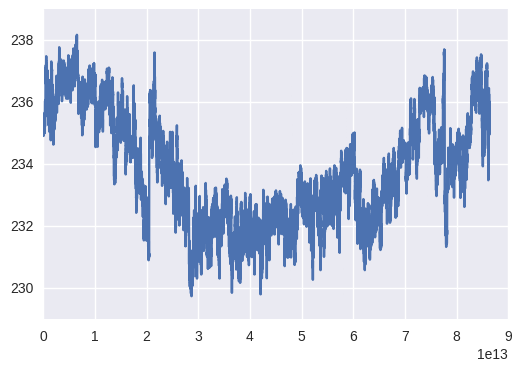

In [24]:
import numpy as np

x = dfs['Time'].where (dfs['Location'] == 'Torschlag_Trafo_07012016.csv')
y = dfs['V1'].where (dfs['Location'] == 'Torschlag_Trafo_07012016.csv')

plt.plot(x,y)
plt.savefig('Voltage vs Time Torschlag_Trafo_07012016.png')
plt.show()

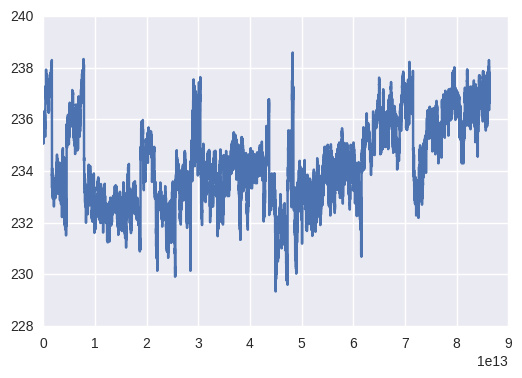

In [25]:
import datetime
import numpy as np

x = dfs['Time'].where (dfs['Location'] == 'Torschlag_Trafo_08012016.csv')
y = dfs['V1'].where (dfs['Location'] == 'Torschlag_Trafo_08012016.csv')

plt.plot(x,y)
plt.savefig('Voltage vs Time Torschlag_Trafo_08012016.png')
plt.show()

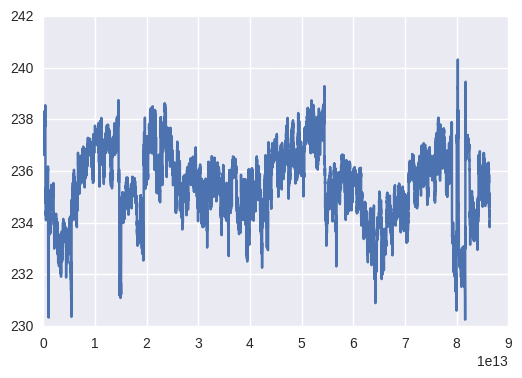

In [26]:
import datetime
import numpy as np

x = dfs['Time'].where (dfs['Location'] == 'Torschlag_Trafo_09012016.csv')
y = dfs['V1'].where (dfs['Location'] == 'Torschlag_Trafo_09012016.csv')

plt.plot(x,y)
plt.savefig('Voltage vs Time Torschlag_Trafo_09012016.png')
plt.show()

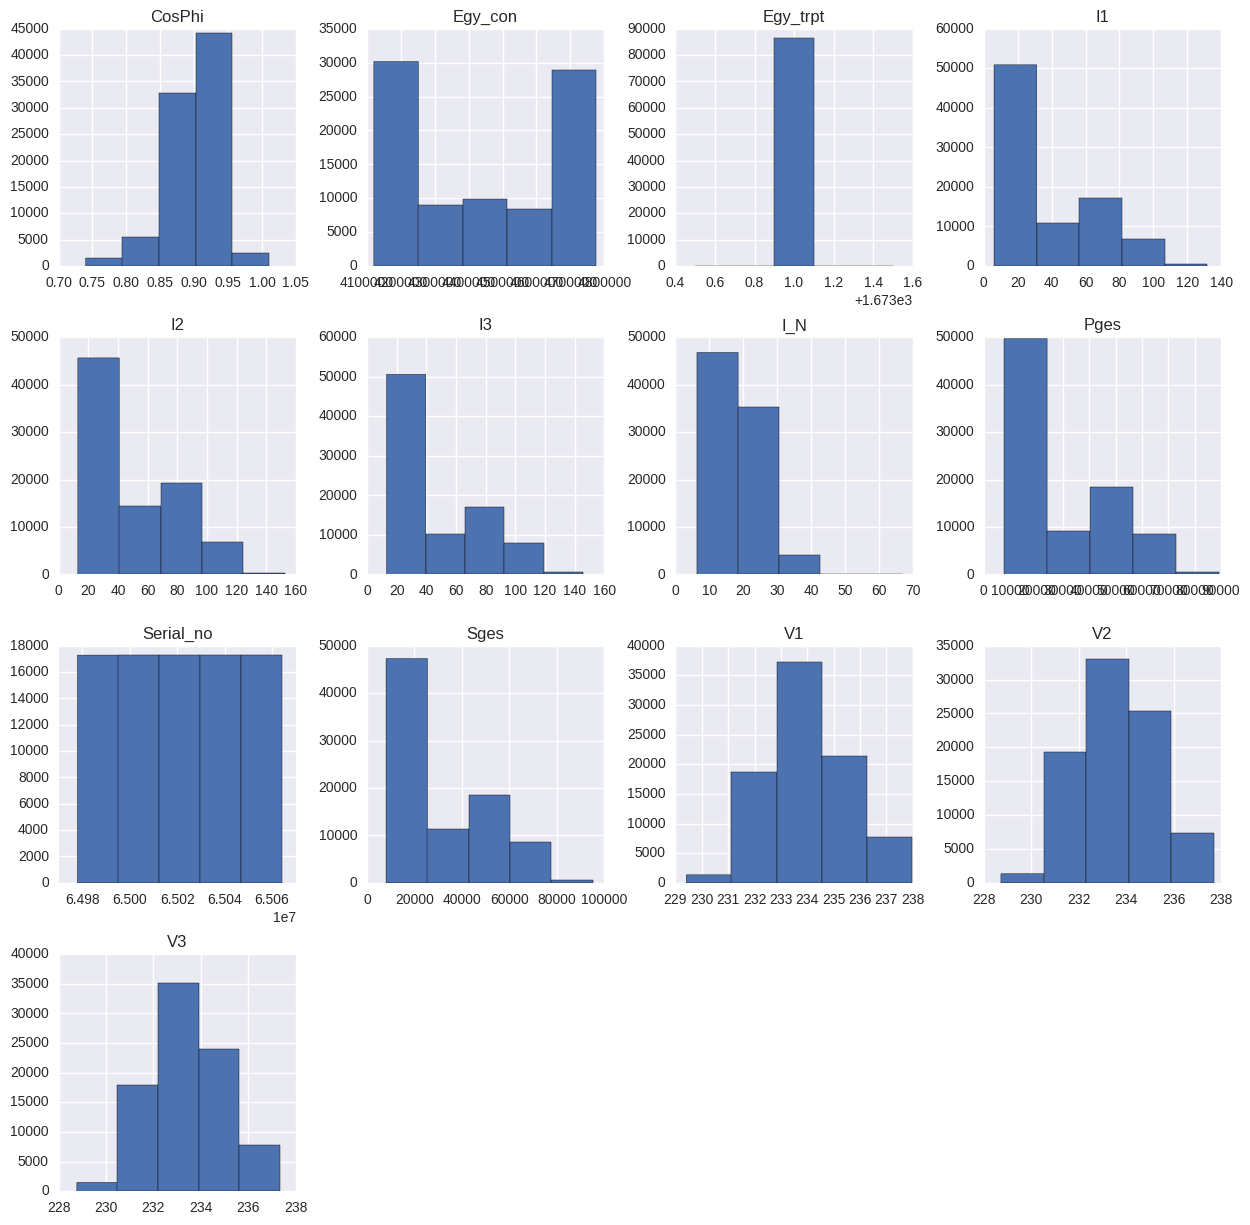

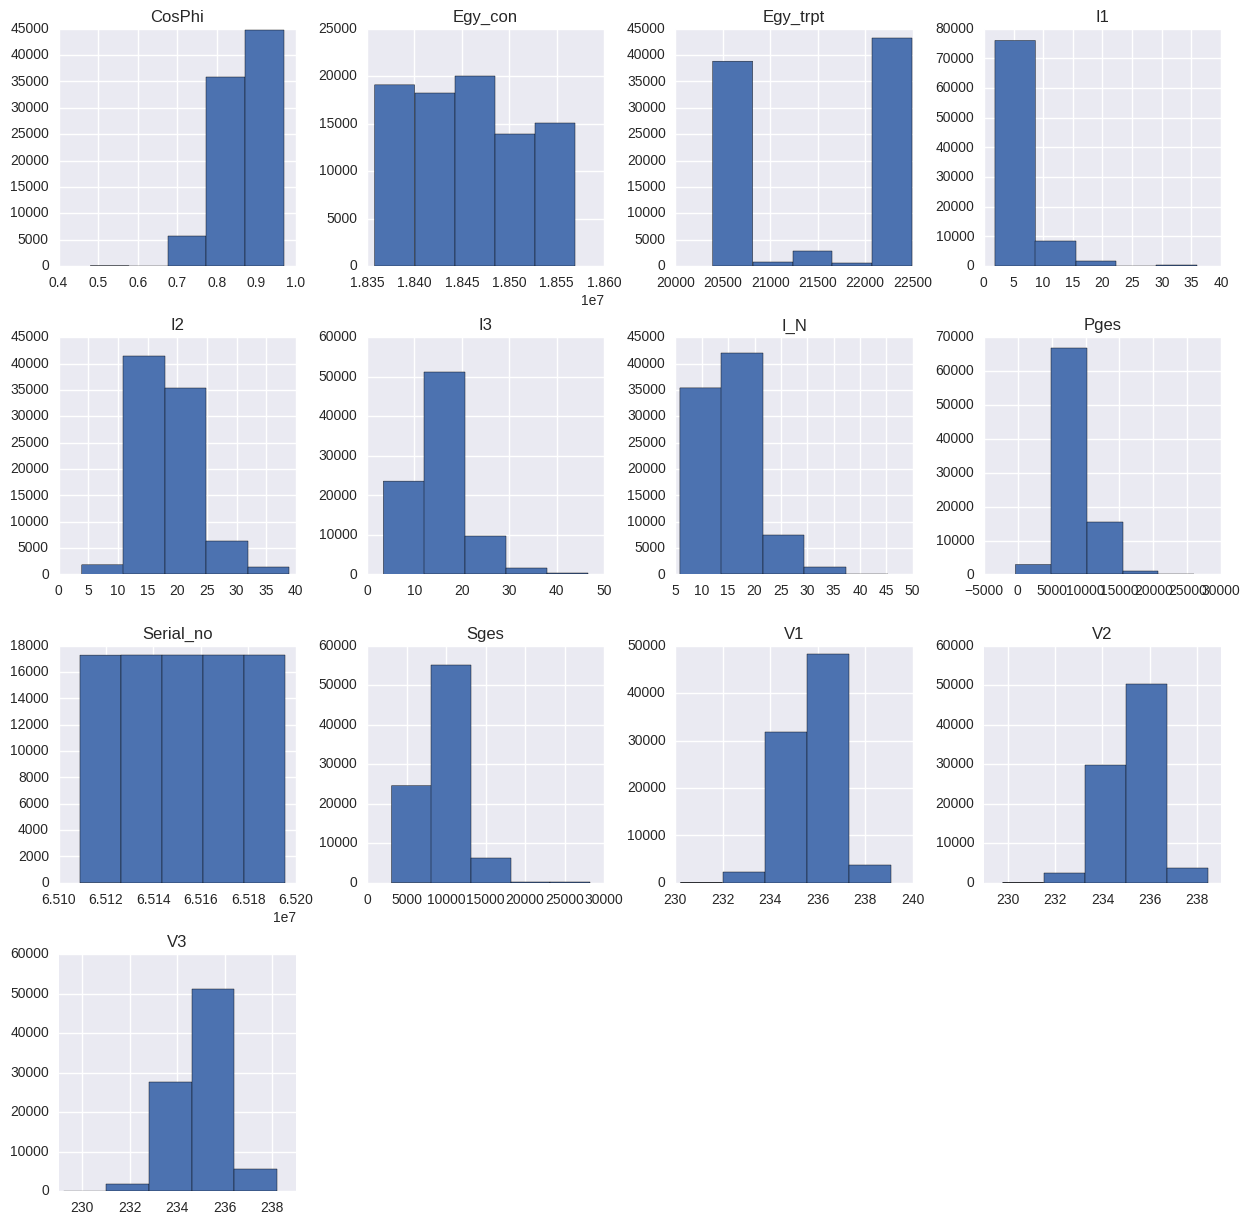

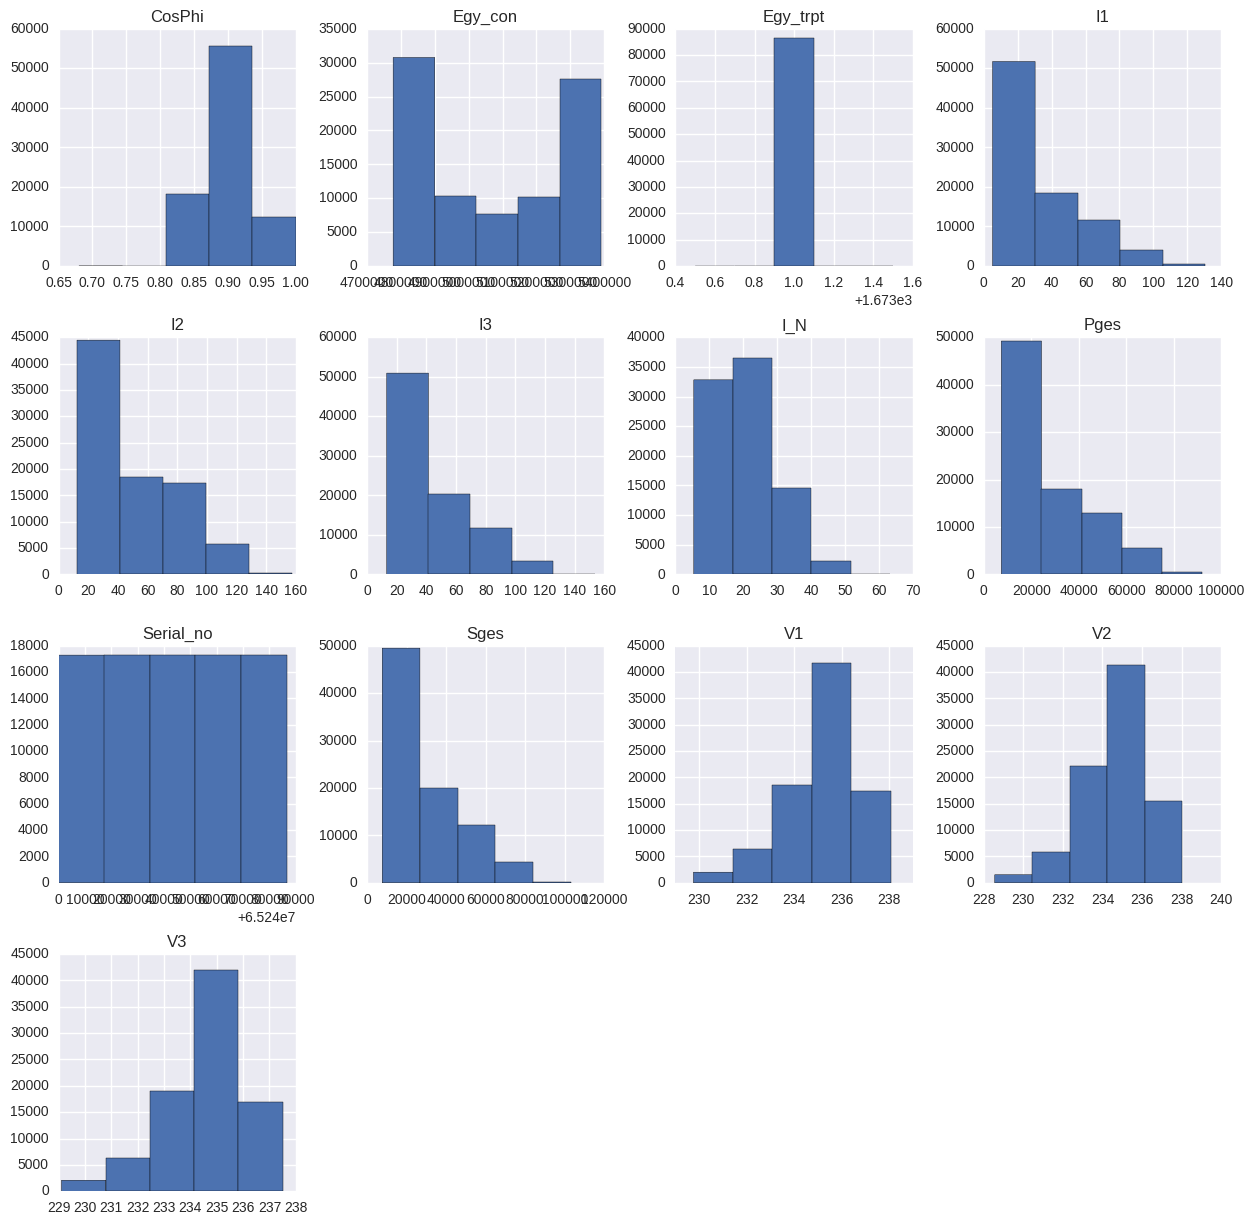

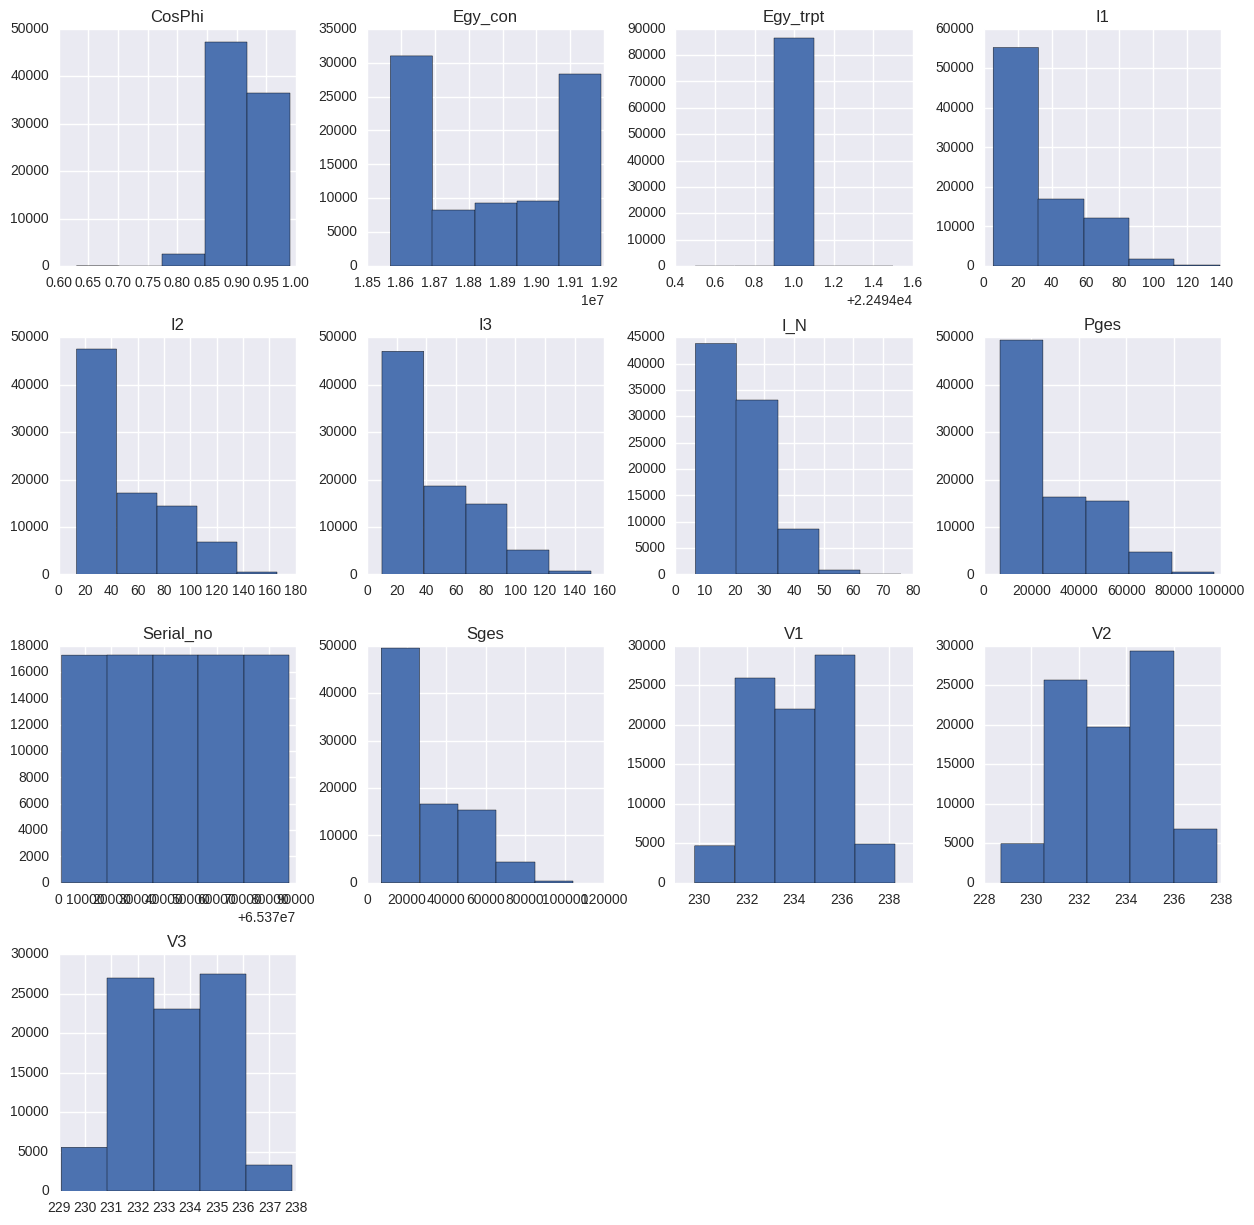

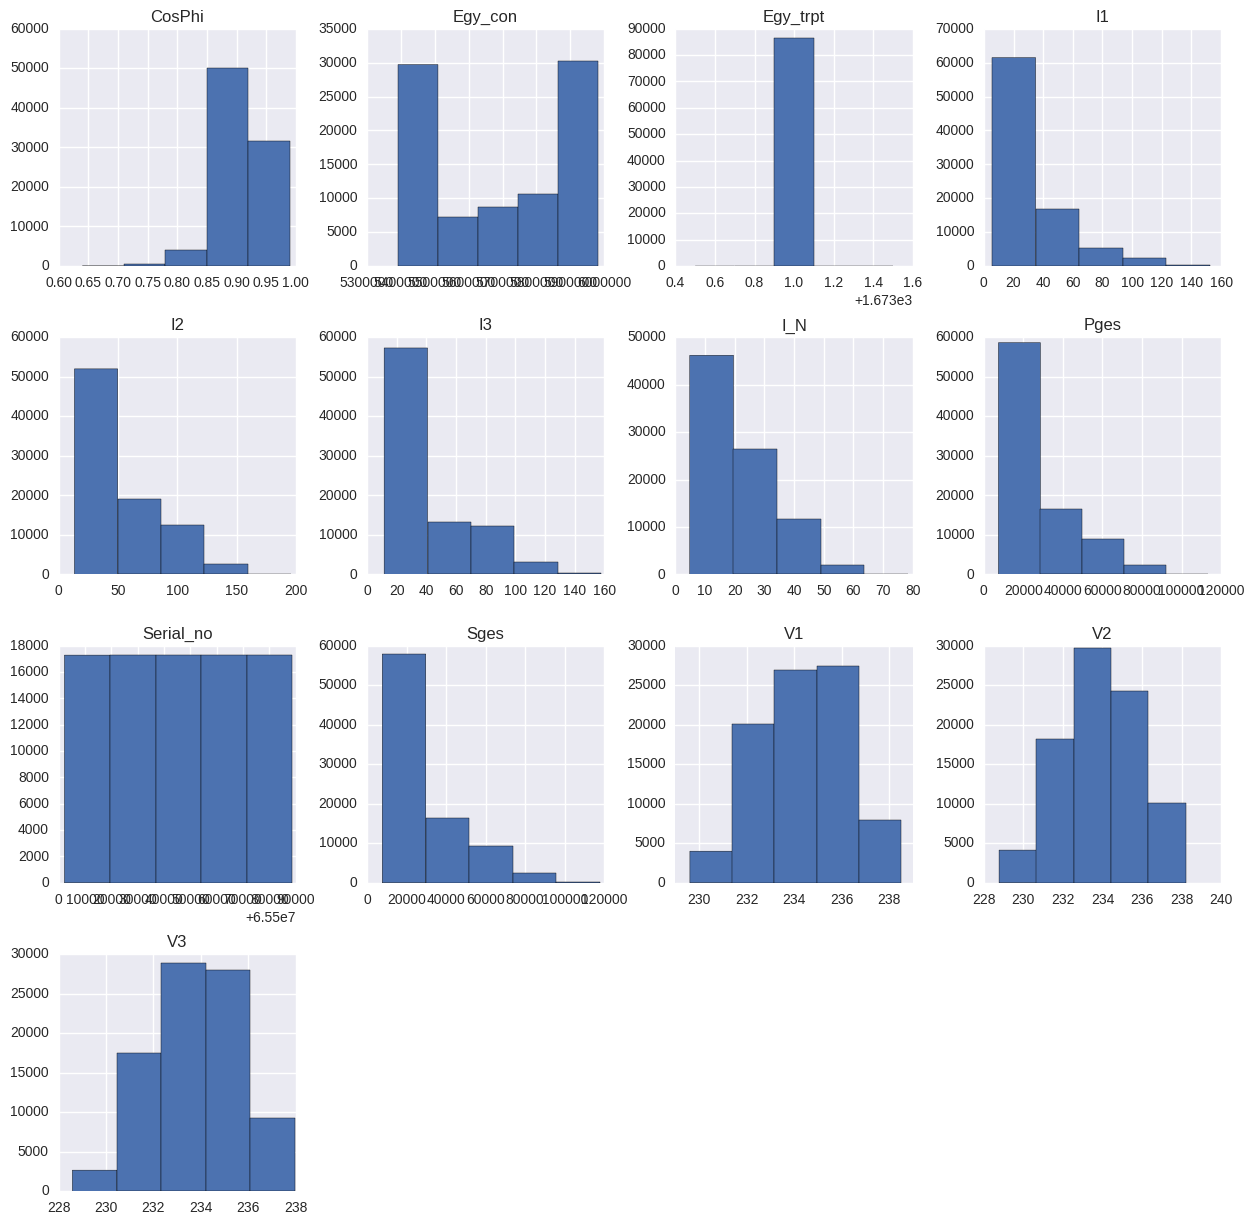

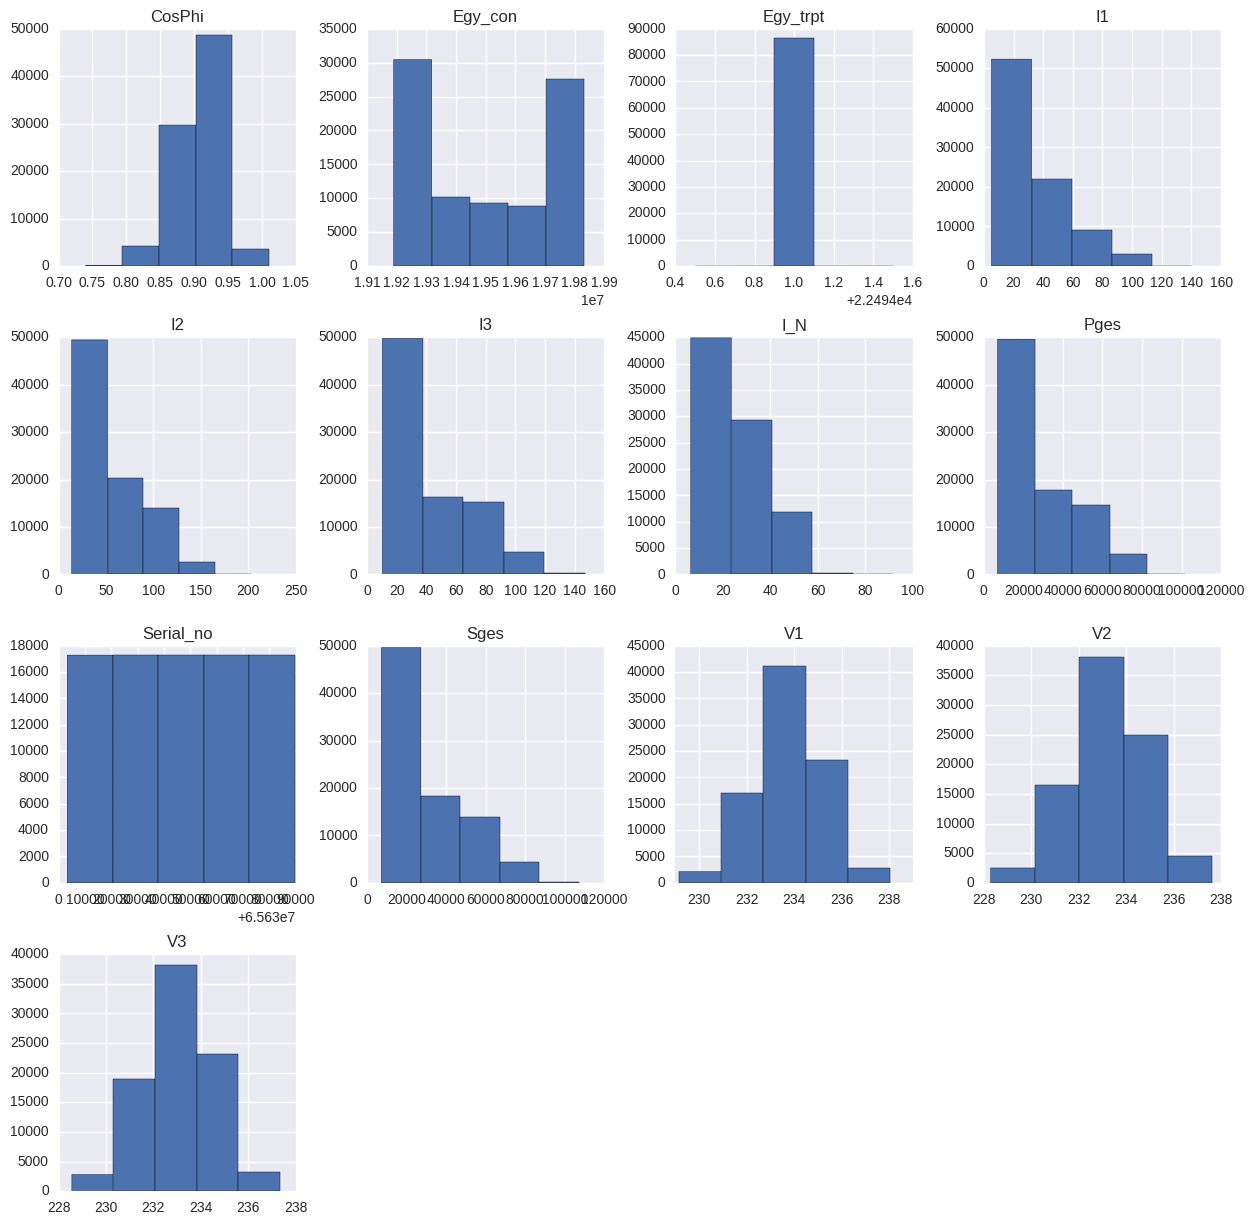

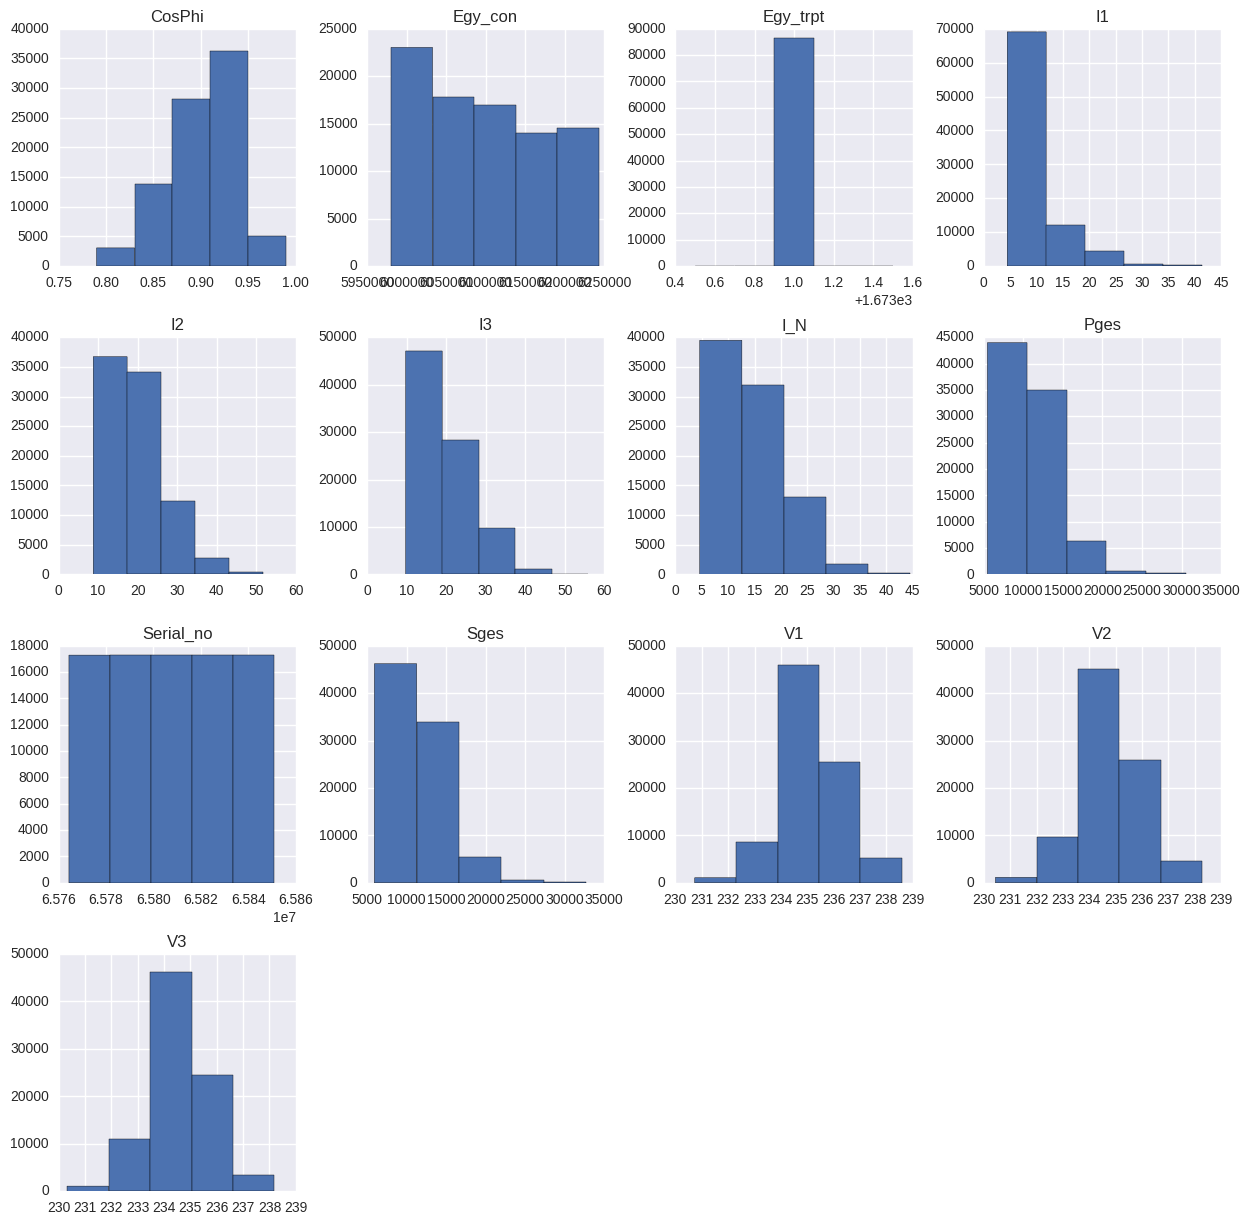

In [25]:
dfs_loc.hist(bins=5,figsize=(15,15))
plt.savefig('Torschlag_Trafo_groupby_location_pearson_corr_1630989_2235787.png')
    

# Compute only the mean of the data grouped by location and visualize

In [26]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_09122015.csv,65021140,234.012877,233.575278,233.419479,32.946041,47.557418,45.163589,19.175125,27383.415623,29293.003159,0.902585,1674.000000,4444440.951818
Torschlag_Trafo_10012016.csv,65152210,235.776925,235.262509,235.009845,6.872705,18.364309,15.040926,15.448493,8697.268520,9473.207176,0.865805,21485.613773,18456958.061005
Torschlag_Trafo_10122015.csv,65283280,235.198219,234.665996,234.568338,28.585301,46.392471,41.298648,21.453762,25607.607488,27263.947715,0.901724,1674.000000,5073539.318355
Torschlag_Trafo_11012016.csv,65414350,234.121101,233.415098,233.423117,28.421225,48.197310,41.037987,21.887680,25878.736963,27371.346309,0.906640,22495.000000,18870719.240160
Torschlag_Trafo_11122015.csv,65545420,234.396781,233.890560,233.805491,26.307707,47.137372,37.900451,21.972923,24546.931799,25979.452433,0.901994,1674.000000,5690940.608638
Torschlag_Trafo_12012016.csv,65676490,233.772850,233.241178,233.074638,28.550378,52.218166,39.602860,25.202058,26728.716727,27991.101158,0.908226,22495.000000,19499177.664686
Torschlag_Trafo_12122015.csv,65807560,235.129841,234.791618,234.599077,9.808779,20.232700,19.047406,14.917048,10938.667322,11524.223899,0.897825,1674.000000,6099134.407097


In [27]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_1630989_2235787.csv',sep=',')

# Plot the groupby location 

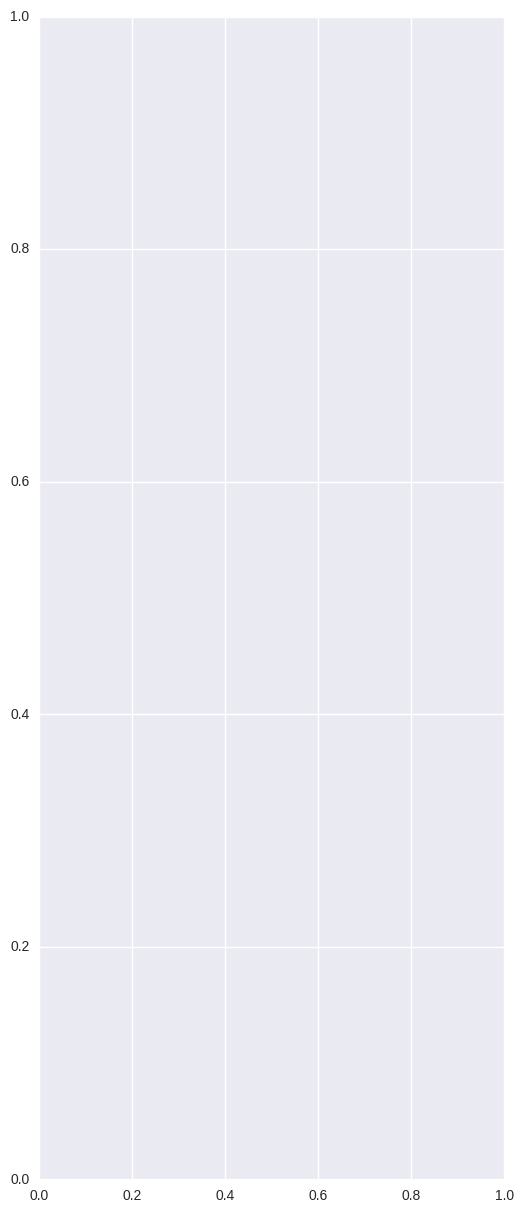

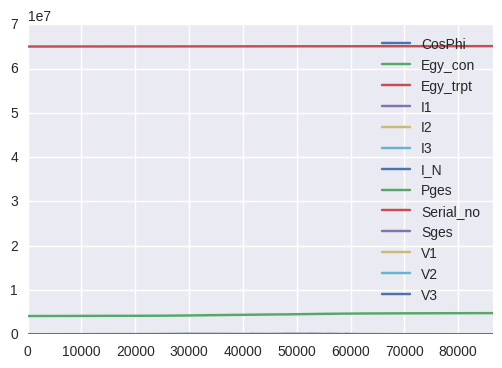

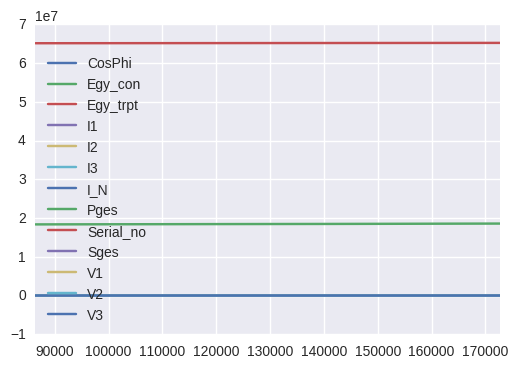

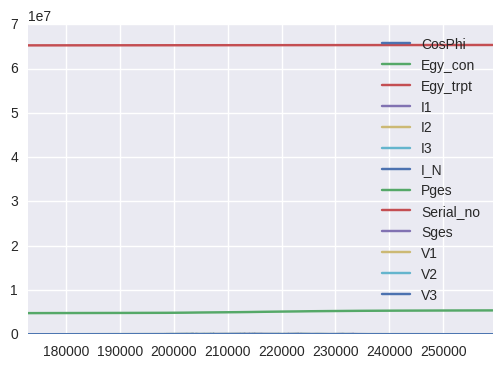

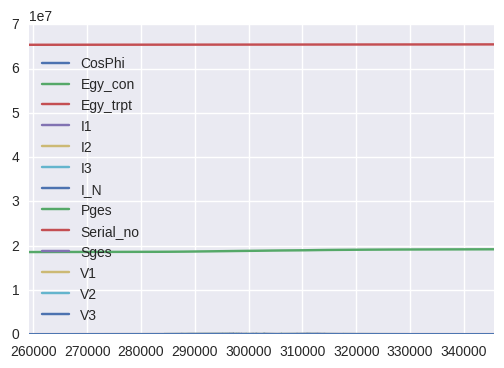

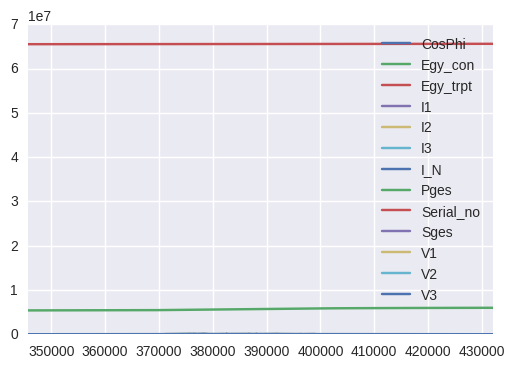

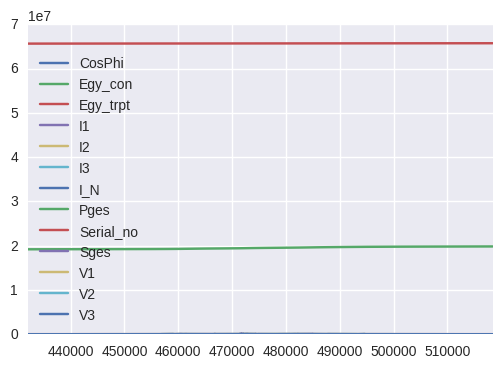

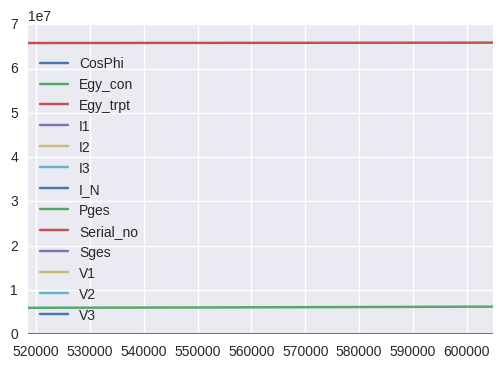

In [28]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [29]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [30]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [31]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 234.35,  234.04,  234.  ,   10.54,   27.9 ,   28.89],
       [ 234.8 ,  234.44,  234.41,   10.59,   27.99,   28.82],
       [ 234.8 ,  234.44,  234.41,   10.59,   27.99,   28.82],
       ..., 
       [ 234.88,  234.52,  234.3 ,    6.89,   14.89,   17.37],
       [ 234.91,  234.57,  234.37,    6.83,   15.34,   17.39],
       [ 234.91,  234.57,  234.37,    6.83,   15.34,   17.39]])

In [32]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [33]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [34]:
Y_sklearn.shape

(604799, 6)

In [35]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,-0.348447,-0.533887,0.031373,-0.192767,0.157563,0.039538
1,-0.665587,-0.219030,0.049515,-0.189104,0.146853,0.022887
2,-0.665587,-0.219030,0.049515,-0.189104,0.146853,0.022887
3,-0.665587,-0.219030,0.049515,-0.189104,0.146853,0.022887
4,-0.665587,-0.219030,0.049515,-0.189104,0.146853,0.022887


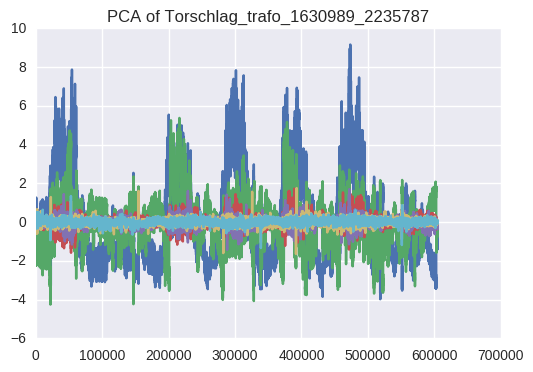

In [36]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_1630989_2235787")

fig.savefig('PCA of Torschlag_Trafo_1630989_2235787.png')


# Plot V1 and I1 vs Time of all locations extracted from SQL.

In [37]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()
dfs['Location'].unique()

array(['Torschlag_Trafo_09122015.csv', 'Torschlag_Trafo_10012016.csv',
       'Torschlag_Trafo_10122015.csv', 'Torschlag_Trafo_11012016.csv',
       'Torschlag_Trafo_11122015.csv', 'Torschlag_Trafo_12012016.csv',
       'Torschlag_Trafo_12122015.csv'], dtype=object)

In [38]:
def plotfunc(ax, a, b):
    return ax.plot(a, b)

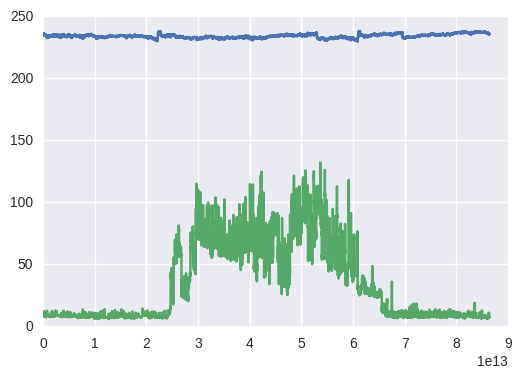

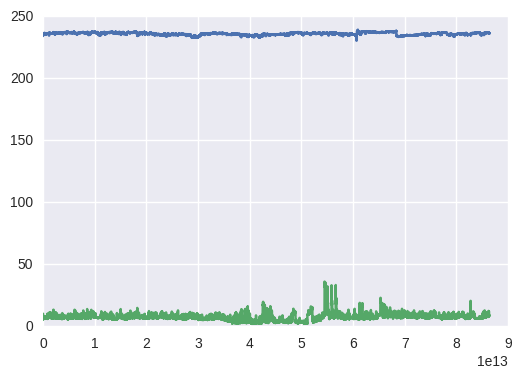

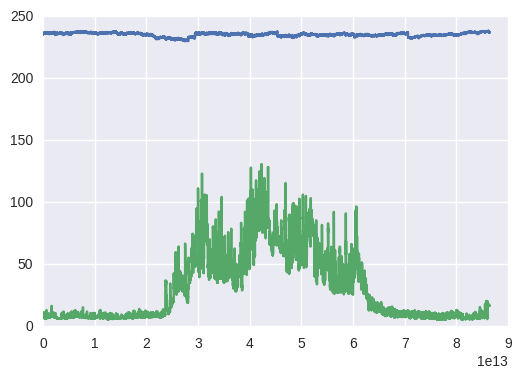

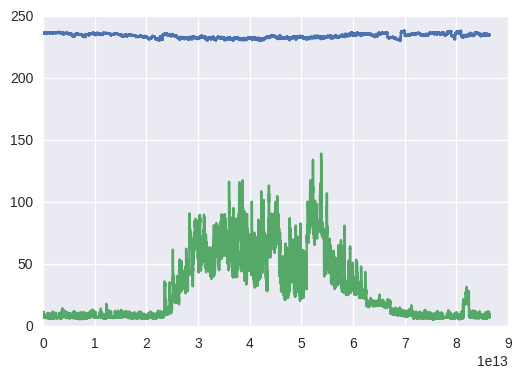

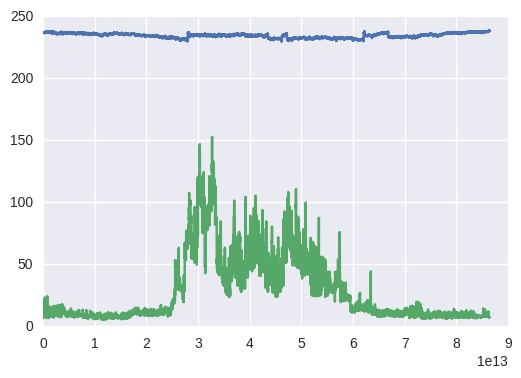

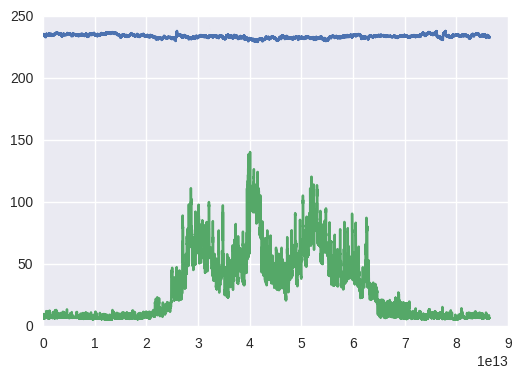

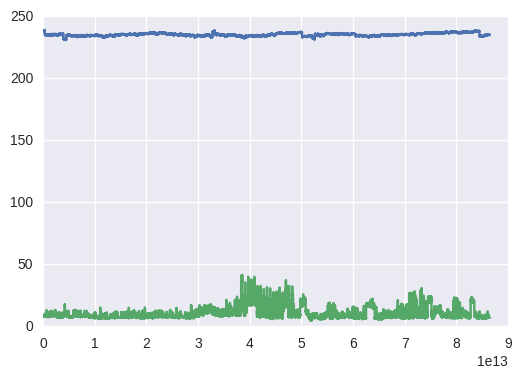

In [39]:
for loc in iter(dfs['Location'].unique()):
    fig, ax = plt.subplots(1,1)
    b = dfs['V1'].where (dfs['Location'] == loc)
    b1 = dfs['I1'].where (dfs['Location'] == loc)
    a = dfs['Time'].where (dfs['Location'] == loc)
    l1 = plotfunc(ax, a, b)
    l2 = plotfunc(ax, a, b1)
    plt.savefig('V1_I1_Time of %s.png' % loc)
    plt.show()